In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [69]:
# Interval = [a,b]
a = 0
b = 1 
Nplots = 1025 # number of points I want to plot
N = 3 # degree of the polynomial space

In [71]:
x = linspace(a, b, Nplots)
q = linspace(a, b, N) #Points of interpolation

In [73]:
def myplot(f, plotpoints=x, interpolationpoints=q):  #x,q -> default values, specified earlier
    plot(interpolationpoints,f(interpolationpoints),'or') # 'or' o-circles, r-red
    plot(plotpoints,f(plotpoints))

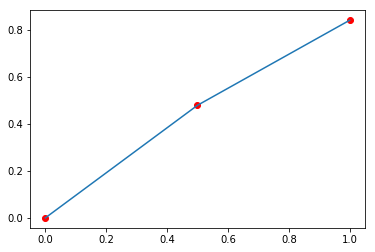

In [75]:
myplot(sin, q)

In [77]:
B = zeros((N, N))



In [79]:
# Broadcasting method
for i in range(N):
    B[:,i] = q**i

In [81]:
# Traditional, less efficient
#for i in range(N):
#    for j in range(N):
#        B[i,j]=q[i]**j

In [83]:
# The EFFICIENT WAY!
# No need to define B before
B = q.reshape((N, 1))**arange(N)

In [85]:
B


array([[1.  , 0.  , 0.  ],
       [1.  , 0.5 , 0.25],
       [1.  , 1.  , 1.  ]])

In [87]:
C = inv(B)
C

array([[ 1.,  0.,  0.],
       [-3.,  4., -1.],
       [ 2., -4.,  2.]])

In [89]:
B.dot(C)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [91]:
I = arange(N)

In [93]:
cond(B)

15.099657722502098

In [95]:
X = x.reshape((-1,1))
X = X**I

In [97]:
X.shape

(1025, 3)

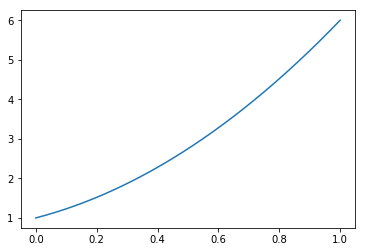

In [100]:
# plot 1+2*x+3*x^2
p = array([1,2,3])
plot(x, X.dot(p))

In [103]:
def myfun(x):
    return sin(2*pi*x)

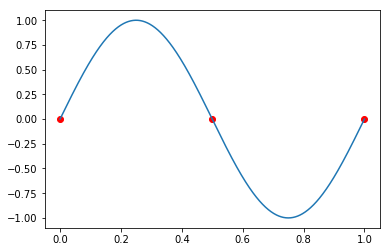

In [105]:
myplot(myfun)

In [107]:
# Compute the polynomial that interpolates myfun on q

p = inv(B).dot(myfun(q))
p

array([ 0.00000000e+00,  7.34788079e-16, -9.79717439e-16])

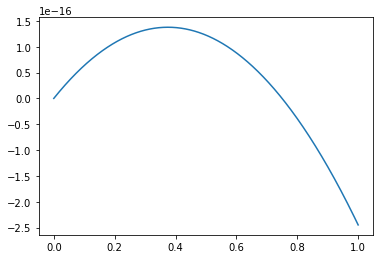

In [109]:
plot(x, X.dot(p))

In [111]:
def interpolation(myfun, q, x):
    """ Return the polynomial interpolation of myfun at the points q,
    evaluated at the points x.
    
    You can plot this by calling 
    plot(x, interpolation(myfun, q, x))
    
    """
    N = len(q)
    I = arange(N)
    Qvec = q.reshape((-1, 1))
    Xvec = x.reshape((-1, 1))
    B = Qvec**I
    X = Xvec**I
    p = inv(B).dot(myfun(q))
    return X.dot(p)

In [113]:
myf = lambda x : 1./(1+50*(x-.5)**2)

In [115]:
y = interpolation(myf, q, x)

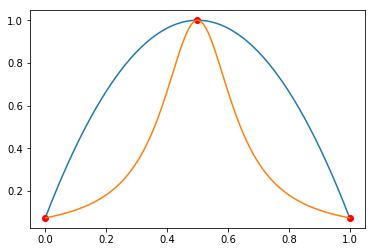

In [117]:
plot(x, y)
plot(q, myf(q), 'ro')
plot(x, myf(x))

In [119]:
def lagrange_basis(q, x):
    """ Return the Lagrange basis functions evaluated at x
    
    """
    N = len(q)
    I = arange(N)
    Qvec = q.reshape((-1, 1))
    Xvec = x.reshape((-1, 1))
    B = Qvec**I
    V = Xvec**I
    L = V.dot(inv(B))
    return L

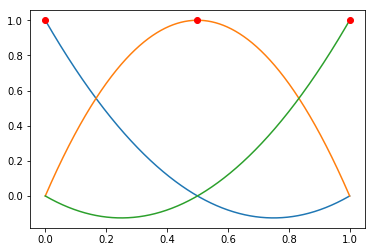

In [120]:
L =lagrange_basis(q, x)
_ = plot(x, L)
_ = plot(q, 0*q+1, 'ro')